In [381]:
  # prompt: importar csv con pandas separas por ;

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/CrisAlejo316/hackaton-innovation-team/refs/heads/main/megashop_clients%20(2).csv", sep=';')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          100000 non-null  object 
 1   client_id               100000 non-null  object 
 2   transaction_date        100000 non-null  object 
 3   amount                  100000 non-null  float64
 4   store_location          100000 non-null  object 
 5   product_category        100000 non-null  object 
 6   payment_method          100000 non-null  object 
 7   channel                 100000 non-null  object 
 8   is_discounted           100000 non-null  int64  
 9   loyalty_points_earned   100000 non-null  int64  
 10  previous_30d_purchases  100000 non-null  int64  
 11  client_tenure_months    100000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.2+ MB


In [383]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

/tmp/ipython-input-383-3937442087.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [384]:
df['store_location'].unique()

array(['Cartagena', 'Santa Marta', 'Barranquilla', 'Cali', 'Bucaramanga',
       'Cúcuta', 'Bogotá', 'Pereira', 'Medellín', 'Manizales'],
      dtype=object)

Segmentación precisa por impacto para retail:
Categoría	Ciudades incluidas	Justificación

🥇 Alta prioridad (Tier 1)	Bogotá, Medellín, Cali, Barranquilla	Grandes poblaciones, centros económicos, alta penetración de marcas retail

🥈 Media prioridad (Tier 2)	Bucaramanga, Cartagena, Cúcuta	Mercados medianos, buena demanda, logística intermedia

🥉 Prioridad táctica (Tier 3)	Santa Marta, Pereira, Manizales	Mercados más pequeños, turismo o consumo estacional, expansión estratégica

In [385]:
ciudades = [
    'Cartagena', 'Santa Marta', 'Barranquilla', 'Cali', 'Bucaramanga',
    'Cúcuta', 'Bogotá', 'Pereira', 'Medellín', 'Manizales'
]

In [386]:
segmentacion = {
    'Tier 1': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla'],
    'Tier 2': ['Bucaramanga', 'Cartagena', 'Cúcuta'],
    'Tier 3': ['Santa Marta', 'Pereira', 'Manizales']
}

In [387]:
def asignar_tier(ciudad):
    for tier, lista in segmentacion.items():
        if ciudad in lista:
            return tier
    return 'No clasificada'

In [388]:
df['Tier'] = df['store_location'].apply(asignar_tier)

In [389]:
client_features = df.groupby('client_id')['product_category'].value_counts().unstack(fill_value=0)

In [390]:
client_demographics= df.groupby('client_id').agg(
    total_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    num_transactions=('transaction_id','unique'),
    total_loyalty_points=('loyalty_points_earned','sum'),
    avg_loyalty_points=('loyalty_points_earned','mean'),
    avg_client_nature=('client_tenure_months','mean'),
    tier=('Tier','first'))

In [391]:
client_demographics

,total_amount,avg_amount,num_transactions,total_loyalty_points,avg_loyalty_points,avg_client_nature,tier
client_id,,,,,,,
C000001,591.60,84.514286,"[T0018438, T0021686, T0033571, T0054361, T0061...",60,8.571429,17.142857,Tier 3
C000002,464.34,66.334286,"[T0022848, T0039483, T0043631, T0049957, T0051...",47,6.714286,12.714286,Tier 1
C000003,317.02,79.255000,"[T0001719, T0063576, T0093443, T0098039]",33,8.250000,14.500000,Tier 2
C000004,266.90,53.380000,"[T0002990, T0007595, T0021867, T0054348, T0071...",34,6.800000,14.400000,Tier 2
C000005,100.16,50.080000,"[T0012282, T0018540]",10,5.000000,18.500000,Tier 2
...,...,...,...,...,...,...,...
C019996,697.04,99.577143,"[T0008395, T0061657, T0072581, T0076864, T0083...",90,12.857143,10.142857,Tier 3
C019997,317.08,63.416000,"[T0011476, T0019344, T0019589, T0024176, T0084...",32,6.400000,12.200000,Tier 2
C019998,388.21,97.052500,"[T0035766, T0041964, T0060753, T0097801]",50,12.500000,18.750000,Tier 1


In [392]:
client_demographics['avg_client_tenure_month'] = df.groupby('client_id')['client_tenure_months'].max()

In [393]:
client_demographics

,total_amount,avg_amount,num_transactions,total_loyalty_points,avg_loyalty_points,avg_client_nature,tier,avg_client_tenure_month
client_id,,,,,,,,
C000001,591.60,84.514286,"[T0018438, T0021686, T0033571, T0054361, T0061...",60,8.571429,17.142857,Tier 3,30
C000002,464.34,66.334286,"[T0022848, T0039483, T0043631, T0049957, T0051...",47,6.714286,12.714286,Tier 1,24
C000003,317.02,79.255000,"[T0001719, T0063576, T0093443, T0098039]",33,8.250000,14.500000,Tier 2,29
C000004,266.90,53.380000,"[T0002990, T0007595, T0021867, T0054348, T0071...",34,6.800000,14.400000,Tier 2,18
C000005,100.16,50.080000,"[T0012282, T0018540]",10,5.000000,18.500000,Tier 2,19
...,...,...,...,...,...,...,...,...
C019996,697.04,99.577143,"[T0008395, T0061657, T0072581, T0076864, T0083...",90,12.857143,10.142857,Tier 3,24
C019997,317.08,63.416000,"[T0011476, T0019344, T0019589, T0024176, T0084...",32,6.400000,12.200000,Tier 2,28
C019998,388.21,97.052500,"[T0035766, T0041964, T0060753, T0097801]",50,12.500000,18.750000,Tier 1,26


In [394]:
client_df=client_features.join(client_demographics)

In [395]:
client_df

,Automotive,Beauty,Books,Clothing,Electronics,Furniture,Garden,Groceries,Home & Kitchen,Pet Supplies,Sports,Toys,total_amount,avg_amount,num_transactions,total_loyalty_points,avg_loyalty_points,avg_client_nature,tier,avg_client_tenure_month
client_id,,,,,,,,,,,,,,,,,,,,
C000001,0,1,0,2,0,0,1,1,0,1,1,0,591.60,84.514286,"[T0018438, T0021686, T0033571, T0054361, T0061...",60,8.571429,17.142857,Tier 3,30
C000002,0,0,0,0,1,0,1,1,0,2,1,1,464.34,66.334286,"[T0022848, T0039483, T0043631, T0049957, T0051...",47,6.714286,12.714286,Tier 1,24
C000003,0,1,0,0,1,1,0,1,0,0,0,0,317.02,79.255000,"[T0001719, T0063576, T0093443, T0098039]",33,8.250000,14.500000,Tier 2,29
C000004,1,0,0,0,0,1,0,0,0,1,1,1,266.90,53.380000,"[T0002990, T0007595, T0021867, T0054348, T0071...",34,6.800000,14.400000,Tier 2,18
C000005,0,0,0,0,0,0,0,0,0,0,1,1,100.16,50.080000,"[T0012282, T0018540]",10,5.000000,18.500000,Tier 2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C019996,2,0,1,1,0,0,0,1,2,0,0,0,697.04,99.577143,"[T0008395, T0061657, T0072581, T0076864, T0083...",90,12.857143,10.142857,Tier 3,24
C019997,0,2,0,0,0,0,1,1,0,0,1,0,317.08,63.416000,"[T0011476, T0019344, T0019589, T0024176, T0084...",32,6.400000,12.200000,Tier 2,28
C019998,0,2,0,1,1,0,0,0,0,0,0,0,388.21,97.052500,"[T0035766, T0041964, T0060753, T0097801]",50,12.500000,18.750000,Tier 1,26


In [396]:
numerical_features = client_demographics.select_dtypes(include='number').columns.tolist()

In [397]:
numerical_features

['total_amount',
 'avg_amount',
 'total_loyalty_points',
 'avg_loyalty_points',
 'avg_client_nature',
 'avg_client_tenure_month']

In [398]:
features_to_scale = numerical_features

In [399]:
features_to_scale

['total_amount',
 'avg_amount',
 'total_loyalty_points',
 'avg_loyalty_points',
 'avg_client_nature',
 'avg_client_tenure_month']

In [400]:
client_df=client_df.fillna(0)

In [401]:
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(client_df[features_to_scale])

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=features_to_scale, index=client_df.index)

# Combine scaled numerical features with non-numerical and the 'num_transactions' column
scaled_client_df = pd.concat([scaled_numerical_df, client_df[['tier', 'num_transactions']]], axis=1)

In [402]:
scaled_client_df

,total_amount,avg_amount,total_loyalty_points,avg_loyalty_points,avg_client_nature,avg_client_tenure_month,tier,num_transactions
client_id,,,,,,,,
C000001,0.329873,-0.432195,0.069864,-0.673111,0.621862,1.010669,Tier 3,"[T0018438, T0021686, T0033571, T0054361, T0061..."
C000002,-0.142639,-0.940567,-0.340816,-1.102027,-0.370844,0.017229,Tier 1,"[T0022848, T0039483, T0043631, T0049957, T0051..."
C000003,-0.689633,-0.579261,-0.783087,-0.747347,0.029441,0.845096,Tier 2,"[T0001719, T0063576, T0093443, T0098039]"
C000004,-0.875727,-1.302811,-0.751496,-1.082230,0.007025,-0.976211,Tier 2,"[T0002990, T0007595, T0021867, T0054348, T0071..."
C000005,-1.494826,-1.395090,-1.509676,-1.497948,0.926078,-0.810638,Tier 2,"[T0012282, T0018540]"
...,...,...,...,...,...,...,...,...
C019996,0.721368,-0.010988,1.017588,0.316693,-0.947253,0.017229,Tier 3,"[T0008395, T0061657, T0072581, T0076864, T0083..."
C019997,-0.689410,-1.022172,-0.814678,-1.174612,-0.486126,0.679522,Tier 2,"[T0011476, T0019344, T0019589, T0024176, T0084..."
C019998,-0.425307,-0.081585,-0.246044,0.234209,0.982118,0.348376,Tier 1,"[T0035766, T0041964, T0060753, T0097801]"


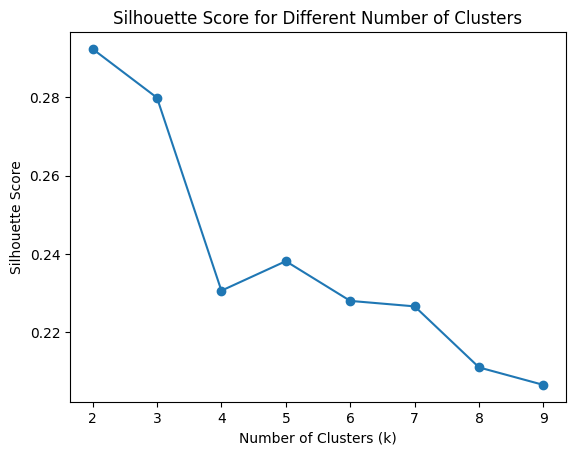

In [403]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_range = range(1, 10)
silhouette_scores = []

# Select only the scaled numerical features for clustering
clustering_data = scaled_client_df[features_to_scale]

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    if k > 1: # Silhouette score is not defined for k=1
        silhouette_avg = silhouette_score(clustering_data, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None) # Append None for k=1

# You can then visualize the silhouette scores to help choose the optimal k
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

In [404]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init to suppress warning
kmeans.fit(clustering_data)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [405]:
client_df['cluster'] = kmeans.fit_predict(scaled_numerical_features)

In [406]:
print(client_df['cluster'].value_counts())

cluster
0    11474
1     8371
Name: count, dtype: int64


In [409]:
cluster_analisis = client_df.drop(['num_transactions', 'tier'], axis=1).groupby('cluster').mean()

In [411]:
cluster_analisis

,Automotive,Beauty,Books,Clothing,Electronics,Furniture,Garden,Groceries,Home & Kitchen,Pet Supplies,Sports,Toys,total_amount,avg_amount,total_loyalty_points,avg_loyalty_points,avg_client_nature,avg_client_tenure_month
cluster,,,,,,,,,,,,,,,,,,
0,0.358811,0.349747,0.343036,0.359073,0.354018,0.348091,0.362820,0.349922,0.358724,0.357678,0.351665,0.361949,336.155533,80.377195,38.071553,9.109626,14.193847,22.816629
1,0.499701,0.515828,0.503166,0.523116,0.505197,0.503405,0.513678,0.498387,0.528611,0.510453,0.511528,0.499940,731.113859,126.825726,84.814120,14.743038,14.608277,25.375343


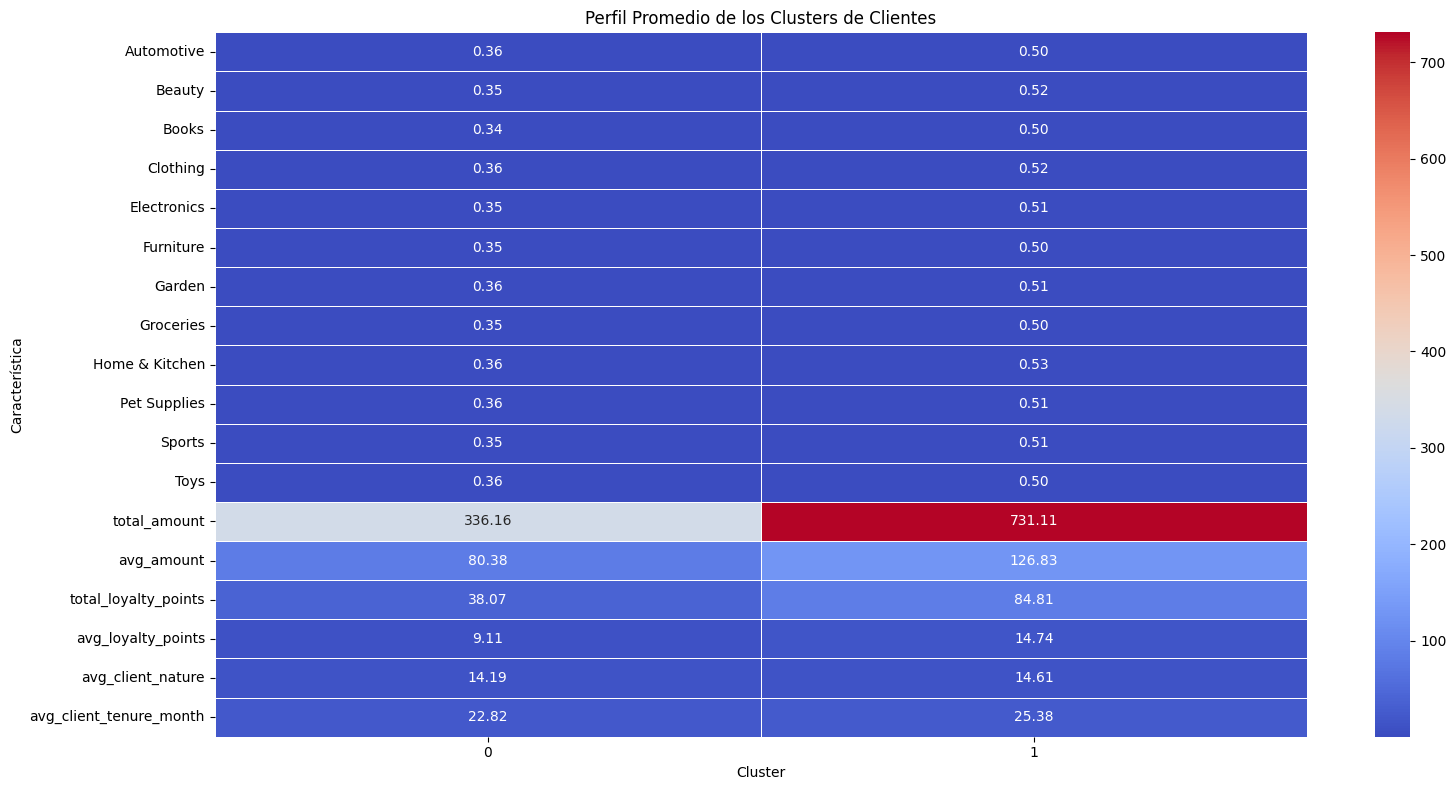

In [415]:
# Visualizar todas las características en un heatmap para una comparación rápida
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_analisis.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Perfil Promedio de los Clusters de Clientes')
plt.ylabel('Característica')
plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig('cluster_profile_heatmap.png')
plt.show()